core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']


['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
['LEC', 'PIA', 'NOR', 'SAI', 'HAM', 'VER', 'RUS', 'PER', 'ALB', 'MAG', 'ALO', 'COL', 'RIC', 'OCO', 'GAS', 'BOT', 'HUL', 'ZHO', 'STR', 'TSU']
   Driver  Stint Compound  StintLength
0     ALB    1.0   MEDIUM           17
1     ALB    2.0     HARD           36
2     ALO    1.0   MEDIUM           12
3     ALO    2.0     HARD           23
4     ALO    3.0     HARD           18
5     BOT    1.0     HARD           33
6     BOT    2.0   MEDIUM           19
7     COL    1.0   MEDIUM           16
8     COL    2.0     HARD           37
9     GAS    1.0   MEDIUM           10
10    GAS    2.0     HARD           20
11    GAS    3.0     HARD           22
12    HAM    1.0   MEDIUM           15
13    HAM    2.0     HARD           22
14    HAM    3.0     HARD           16
15    HUL    1.0   MEDIUM            5
16    HUL    2.0     HARD           27
17    HUL    3.0     HARD           20


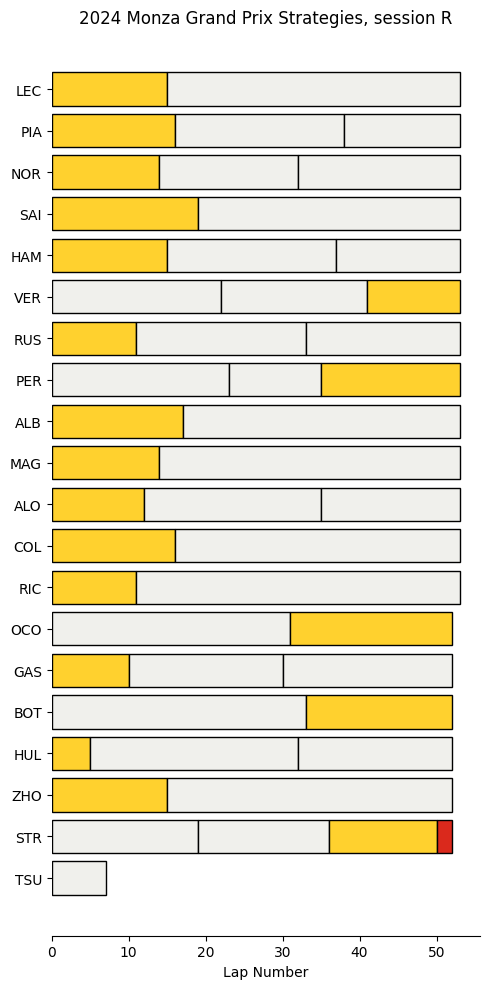

In [2]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

year = 2024
gran_prix = "Monza"
sessionG = 'R'  # Race session

session = fastf1.get_session(year, gran_prix, sessionG)
session.load()
laps = session.laps

drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title(f"{year} {gran_prix} Grand Prix Strategies, session {sessionG}")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()